In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

In [3]:
# Read the data from Excel file
data = pd.read_csv("Credit Card Defaulter Prediction.csv")

In [4]:
print(data.head())

   ID  LIMIT_BAL SEX   EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000   F  University  Married   24      2      2     -1     -1   
1   2     120000   F  University   Single   26     -1      2      0      0   
2   3      90000   F  University   Single   34      0      0      0      0   
3   4      50000   F  University  Married   37      0      0      0      0   
4   5      50000   M  University  Married   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default   
0         0         0         0         Y  
1   

In [5]:
print(data.describe())

                 ID       LIMIT_BAL           AGE         PAY_0         PAY_2  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667     35.485500     -0.016700     -0.133767   
std     8660.398374   129747.661567      9.217904      1.123802      1.197186   
min        1.000000    10000.000000     21.000000     -2.000000     -2.000000   
25%     7500.750000    50000.000000     28.000000     -1.000000     -1.000000   
50%    15000.500000   140000.000000     34.000000      0.000000      0.000000   
75%    22500.250000   240000.000000     41.000000      0.000000      0.000000   
max    30000.000000  1000000.000000     79.000000      8.000000      8.000000   

              PAY_3         PAY_4         PAY_5         PAY_6      BILL_AMT1  \
count  30000.000000  30000.000000  30000.000000  30000.000000   30000.000000   
mean      -0.166200     -0.220667     -0.266200     -0.291100   51223.330900   
std        1.196868      1.169

In [6]:
# Print column names
print(data.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default '],
      dtype='object')


In [7]:
# Preprocess the data
data.drop(columns=["ID"], inplace=True)  # Drop ID column as it doesn't contribute to prediction

In [8]:
# Convert categorical variables to dummy variables
data = pd.get_dummies(data, columns=["SEX", "EDUCATION", "MARRIAGE"], drop_first=True)

In [9]:
data.rename(columns={"default ": "default"}, inplace=True)
# Split data into features and target variable
X = data.drop(columns=["default"])
y = data["default"]

In [10]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Generate predicted probabilities for the test set
y_prob = clf.predict_proba(X_test)[:, 1]

# Convert 'N' to 0 and 'Y' to 1 in the target variable
y_test_binary = y_test.replace({'N': 0, 'Y': 1})

# Calculate False Positive Rate and True Positive Rate
fpr, tpr, _ = roc_curve(y_test_binary, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

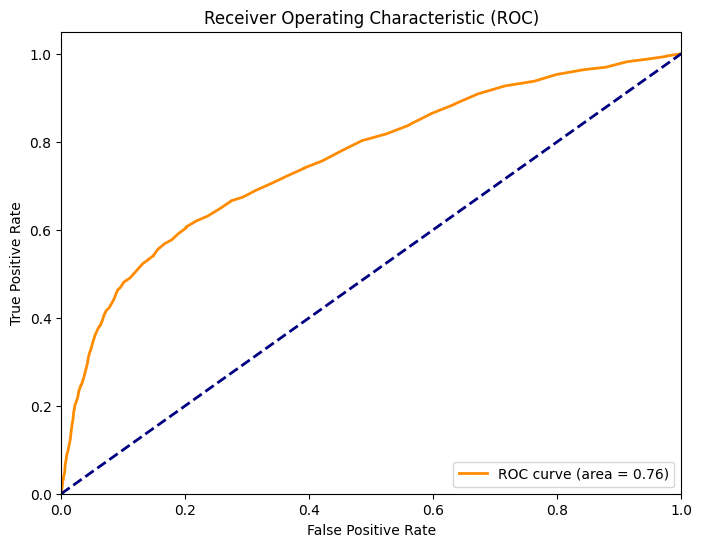

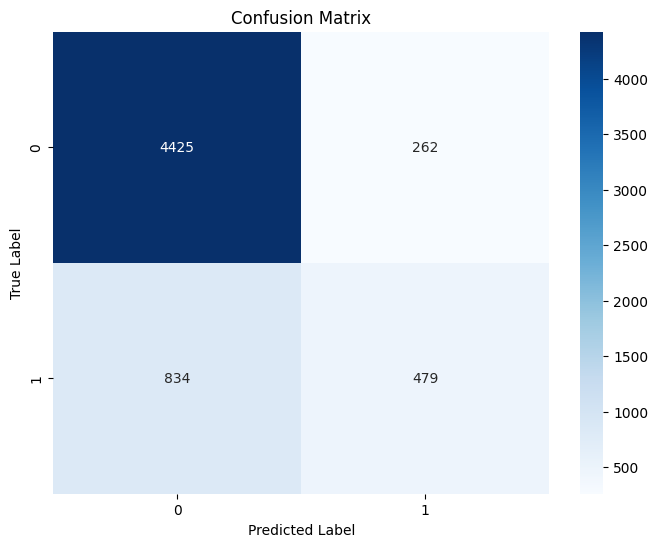

Classification Report:
              precision    recall  f1-score   support

           N       0.84      0.94      0.89      4687
           Y       0.65      0.36      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



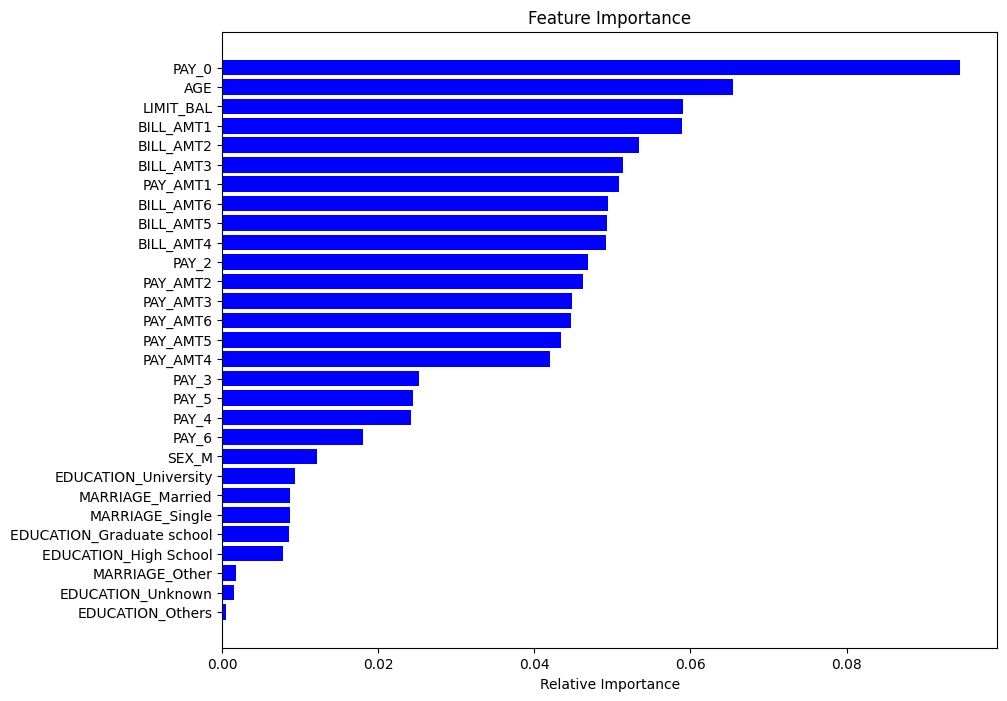

In [11]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance
feature_importance = clf.feature_importances_
features = X.columns
indices = np.argsort(feature_importance)

plt.figure(figsize=(10, 8))
plt.title('Feature Importance')
plt.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
